# Applying a few libraries and algorithms to the data set    
This notebook has been used to asses libraries and algorithms that can/maybe be used for capstone.    
Tthis step will be using the dataframe that has been pre processed with Spacy at the previous step. 

## TOC:
* [Importing the libraries](#first-bullet)  
* [Loading the data from the temp store](#Loading-the-data-from-the-temp-store)  
* [Collecting a data subset](#Collecting-a-data-subset)  
* [Basic Word Visualization](#Basic-Word-Visualization)  
* [Vectorization](#Vectorization)  
* [Clustering](#Clustering)  
* [t-SNE](#t-SNE)  
* [LDA](#LDA)  
* [Cosine similarity](#Cosine-similarity)  
* [Doc2Vec](#Doc2Vec)  
* [Simple K-Means clustering with Within Cluster and Between Cluster Analysis](#simple-k-means)  





### Importing the libraries <a class="anchor" id="first-bullet"></a>


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import time
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
from pandas_profiling import ProfileReport
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dantohe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading the data from the temp store <a class="anchor" id="Loading-the-data-from-the-temp-store"></a>
The previos steps cleand up the data:
1. Eliminated non english publications
2. Removed stop words, punctuation, case matching on title and abstracts


In [201]:
cord_metadata = pd.read_csv('temp/metadata_spacy_processed.zip')
metadata = cord_metadata.copy(deep=True)
print(metadata.columns)
print(f'Frame dimentions {metadata.shape}')


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'cord_uid', 'sha',
       'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract',
       'publish_time', 'authors', 'journal', 'url', 'selection', 'language',
       'title_processed', 'abstract_processed',
       'abstract_processed_word_count', 'abstract_processed_unique_words',
       'title_processed_word_count', 'title_processed_unique_count'],
      dtype='object')
Frame dimentions (30220, 24)


In [202]:
metadata = metadata.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1)
print(f'\nINFO\n{metadata.info()}')
# metadata["Unnamed: 0"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30220 entries, 0 to 30219
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cord_uid                         30220 non-null  object 
 1   sha                              22195 non-null  object 
 2   source_x                         30220 non-null  object 
 3   title                            30220 non-null  object 
 4   doi                              28132 non-null  object 
 5   pmcid                            17010 non-null  object 
 6   pubmed_id                        18318 non-null  float64
 7   license                          30220 non-null  object 
 8   abstract                         30220 non-null  object 
 9   publish_time                     30220 non-null  object 
 10  authors                          29906 non-null  object 
 11  journal                          23950 non-null  object 
 12  url               

## Collecting a data subset  <a class="anchor" id="Collecting-a-data-subset"></a>
Considering the volume of this dataset we will pick only a fraction of it. Based on the impact factor on the matters of Virology  
https://www.scimagojr.com/journalrank.php?category=2406&order=h&ord=desc  
we are considering for this stage only papers published in a limitted set of journals and only after January 1st 2020.

In [203]:
print(f'Total number of publications in the data set {metadata.shape[0]}')

Total number of publications in the data set 30220


Top journals

In [204]:
metadata.journal.value_counts()[0:30]

bioRxiv                                                                                                                 1355
J Med Virol                                                                                                              359
Computational Science - ICCS 2020                                                                                        349
Information Processing and Management of Uncertainty in Knowledge-Based Systems                                          175
medRxiv                                                                                                                  162
Int J Environ Res Public Health                                                                                          153
Int J Infect Dis                                                                                                         152
Advances in Information Retrieval                                                                                        144


Collecting only articles published in some journals and only after January 1st 2020.

In [205]:
journals = ['PLoS One','bioRxiv','Virology','Viruses','The Journal of general virology']
metadata_filtered = metadata[(metadata['publish_time']>'2020-01-01') & (metadata['journal'].isin(journals))]

In [206]:
metadata_filtered.shape

(1574, 21)

In [207]:
metadata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1574 entries, 65 to 30196
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cord_uid                         1574 non-null   object 
 1   sha                              1393 non-null   object 
 2   source_x                         1574 non-null   object 
 3   title                            1574 non-null   object 
 4   doi                              1574 non-null   object 
 5   pmcid                            300 non-null    object 
 6   pubmed_id                        344 non-null    float64
 7   license                          1574 non-null   object 
 8   abstract                         1574 non-null   object 
 9   publish_time                     1574 non-null   object 
 10  authors                          1574 non-null   object 
 11  journal                          1574 non-null   object 
 12  url               

### Basic Word Visualization  <a class="anchor" id="Basic-Word-Visualization"></a>

In [77]:
# Thanks to https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    

#### Title Words

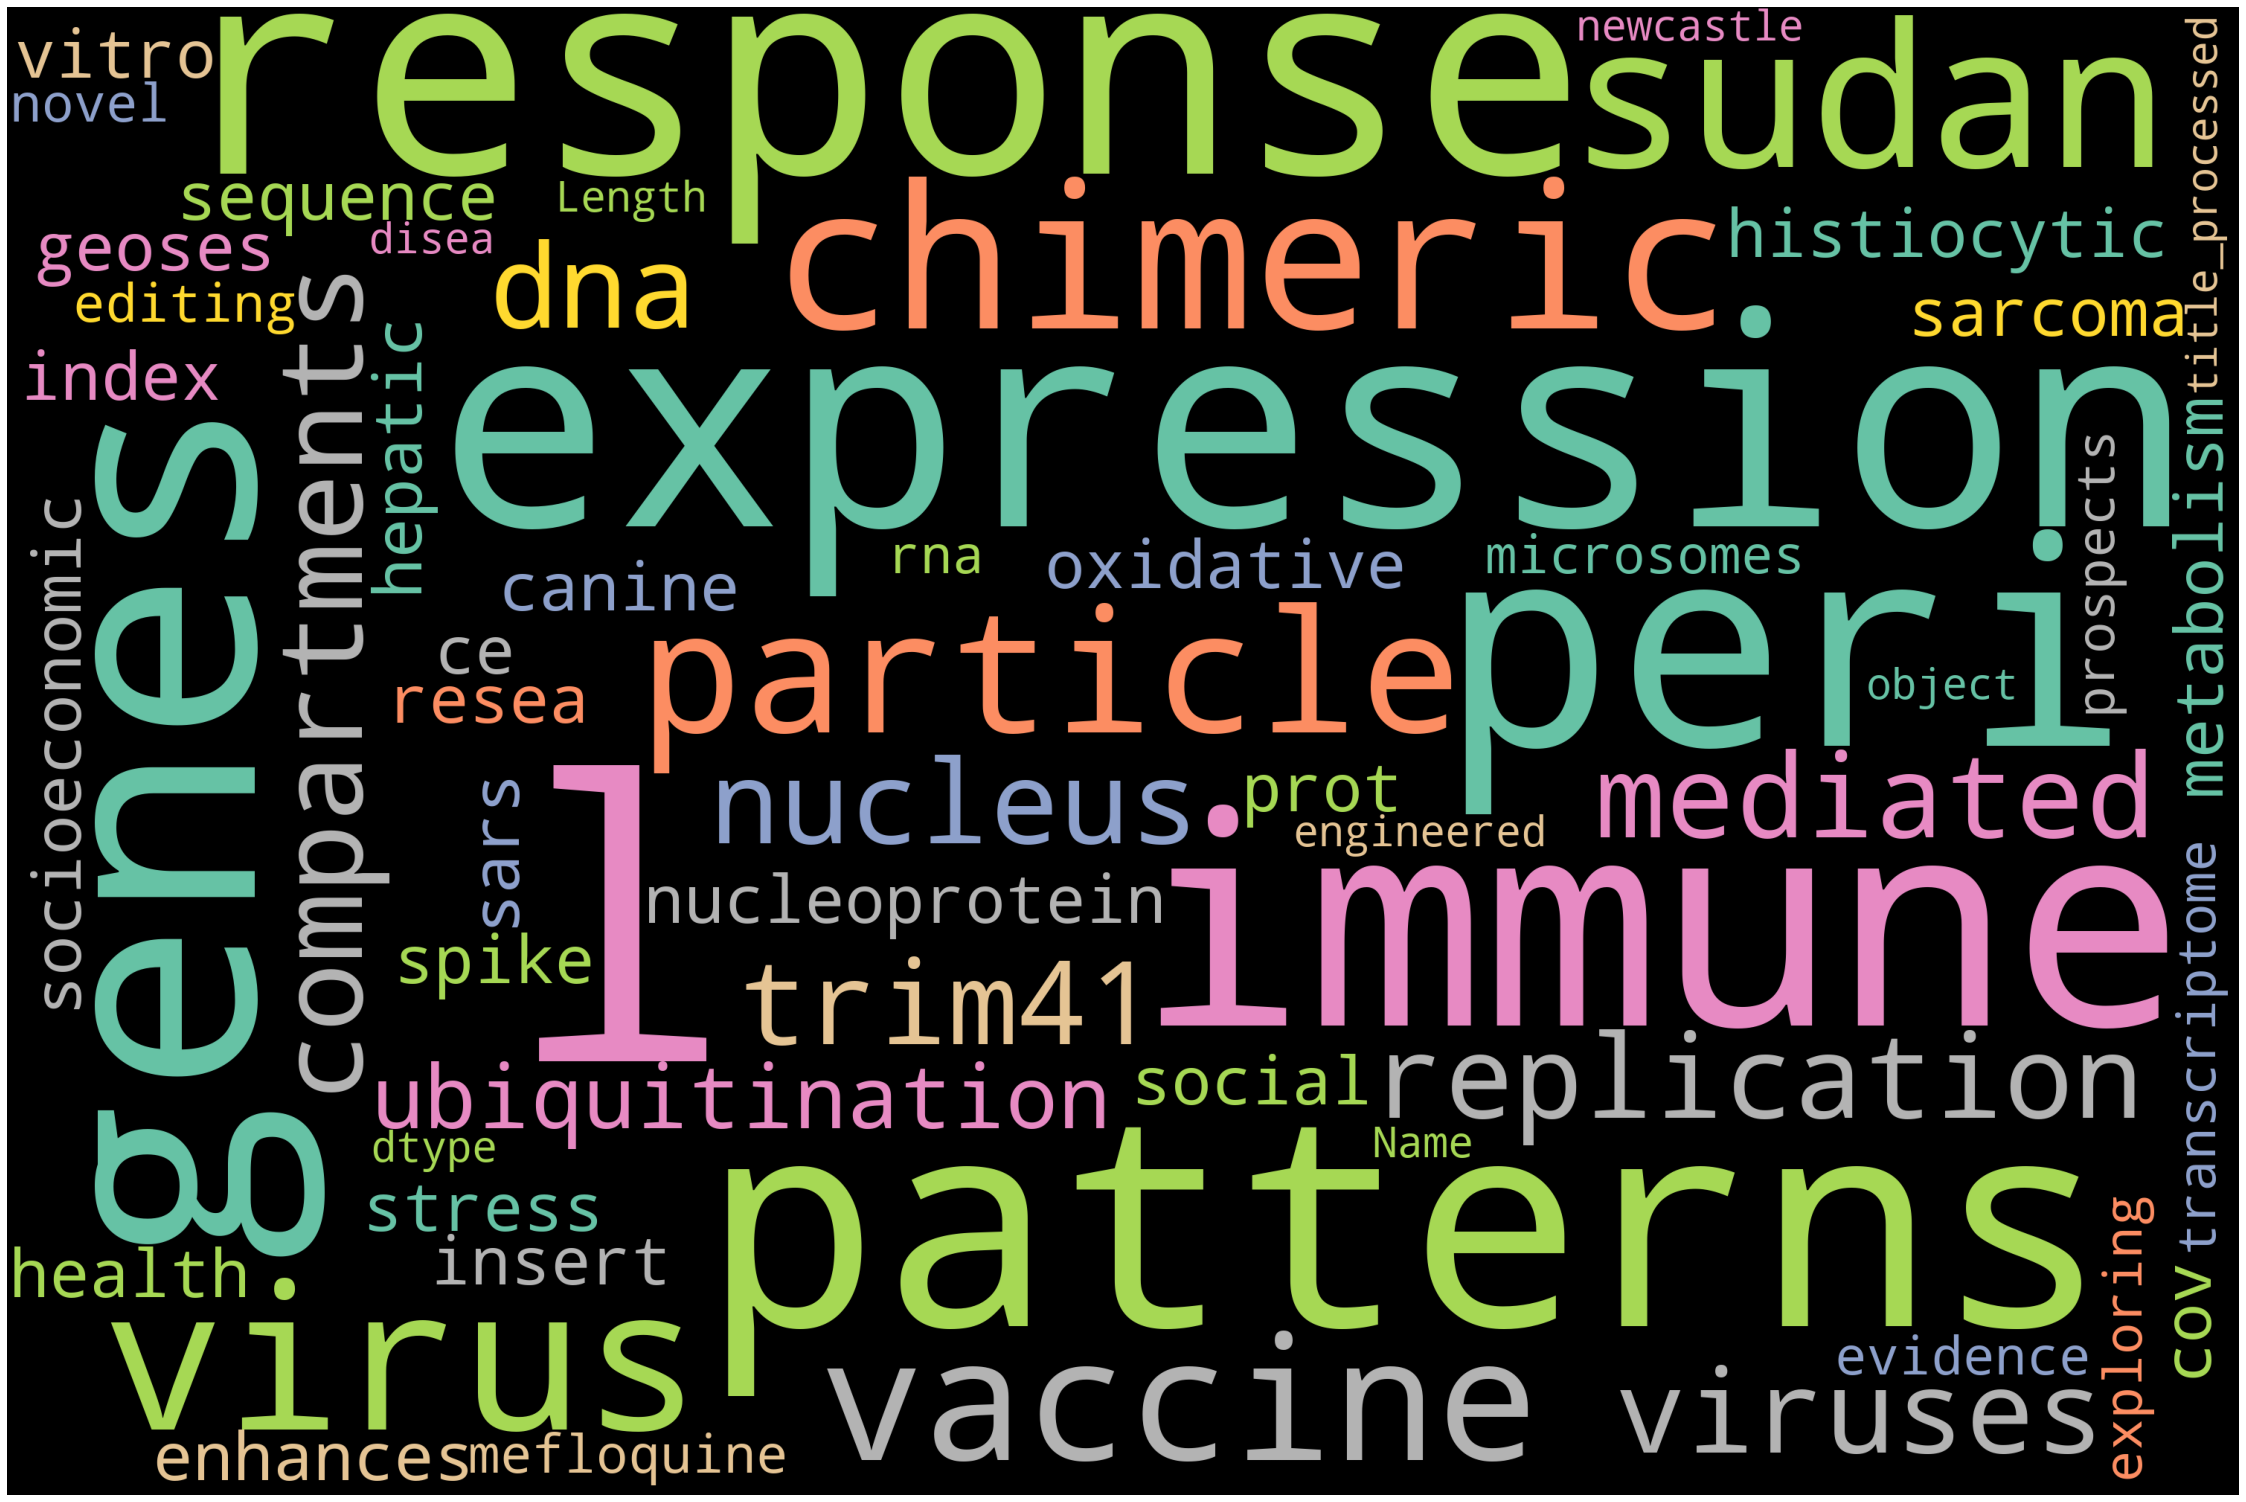

In [78]:
# Import package
from wordcloud import WordCloud

titeles = str(metadata_filtered.title_processed)

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(titeles)

# Plot
plot_cloud(wordcloud)

#### Abstract words

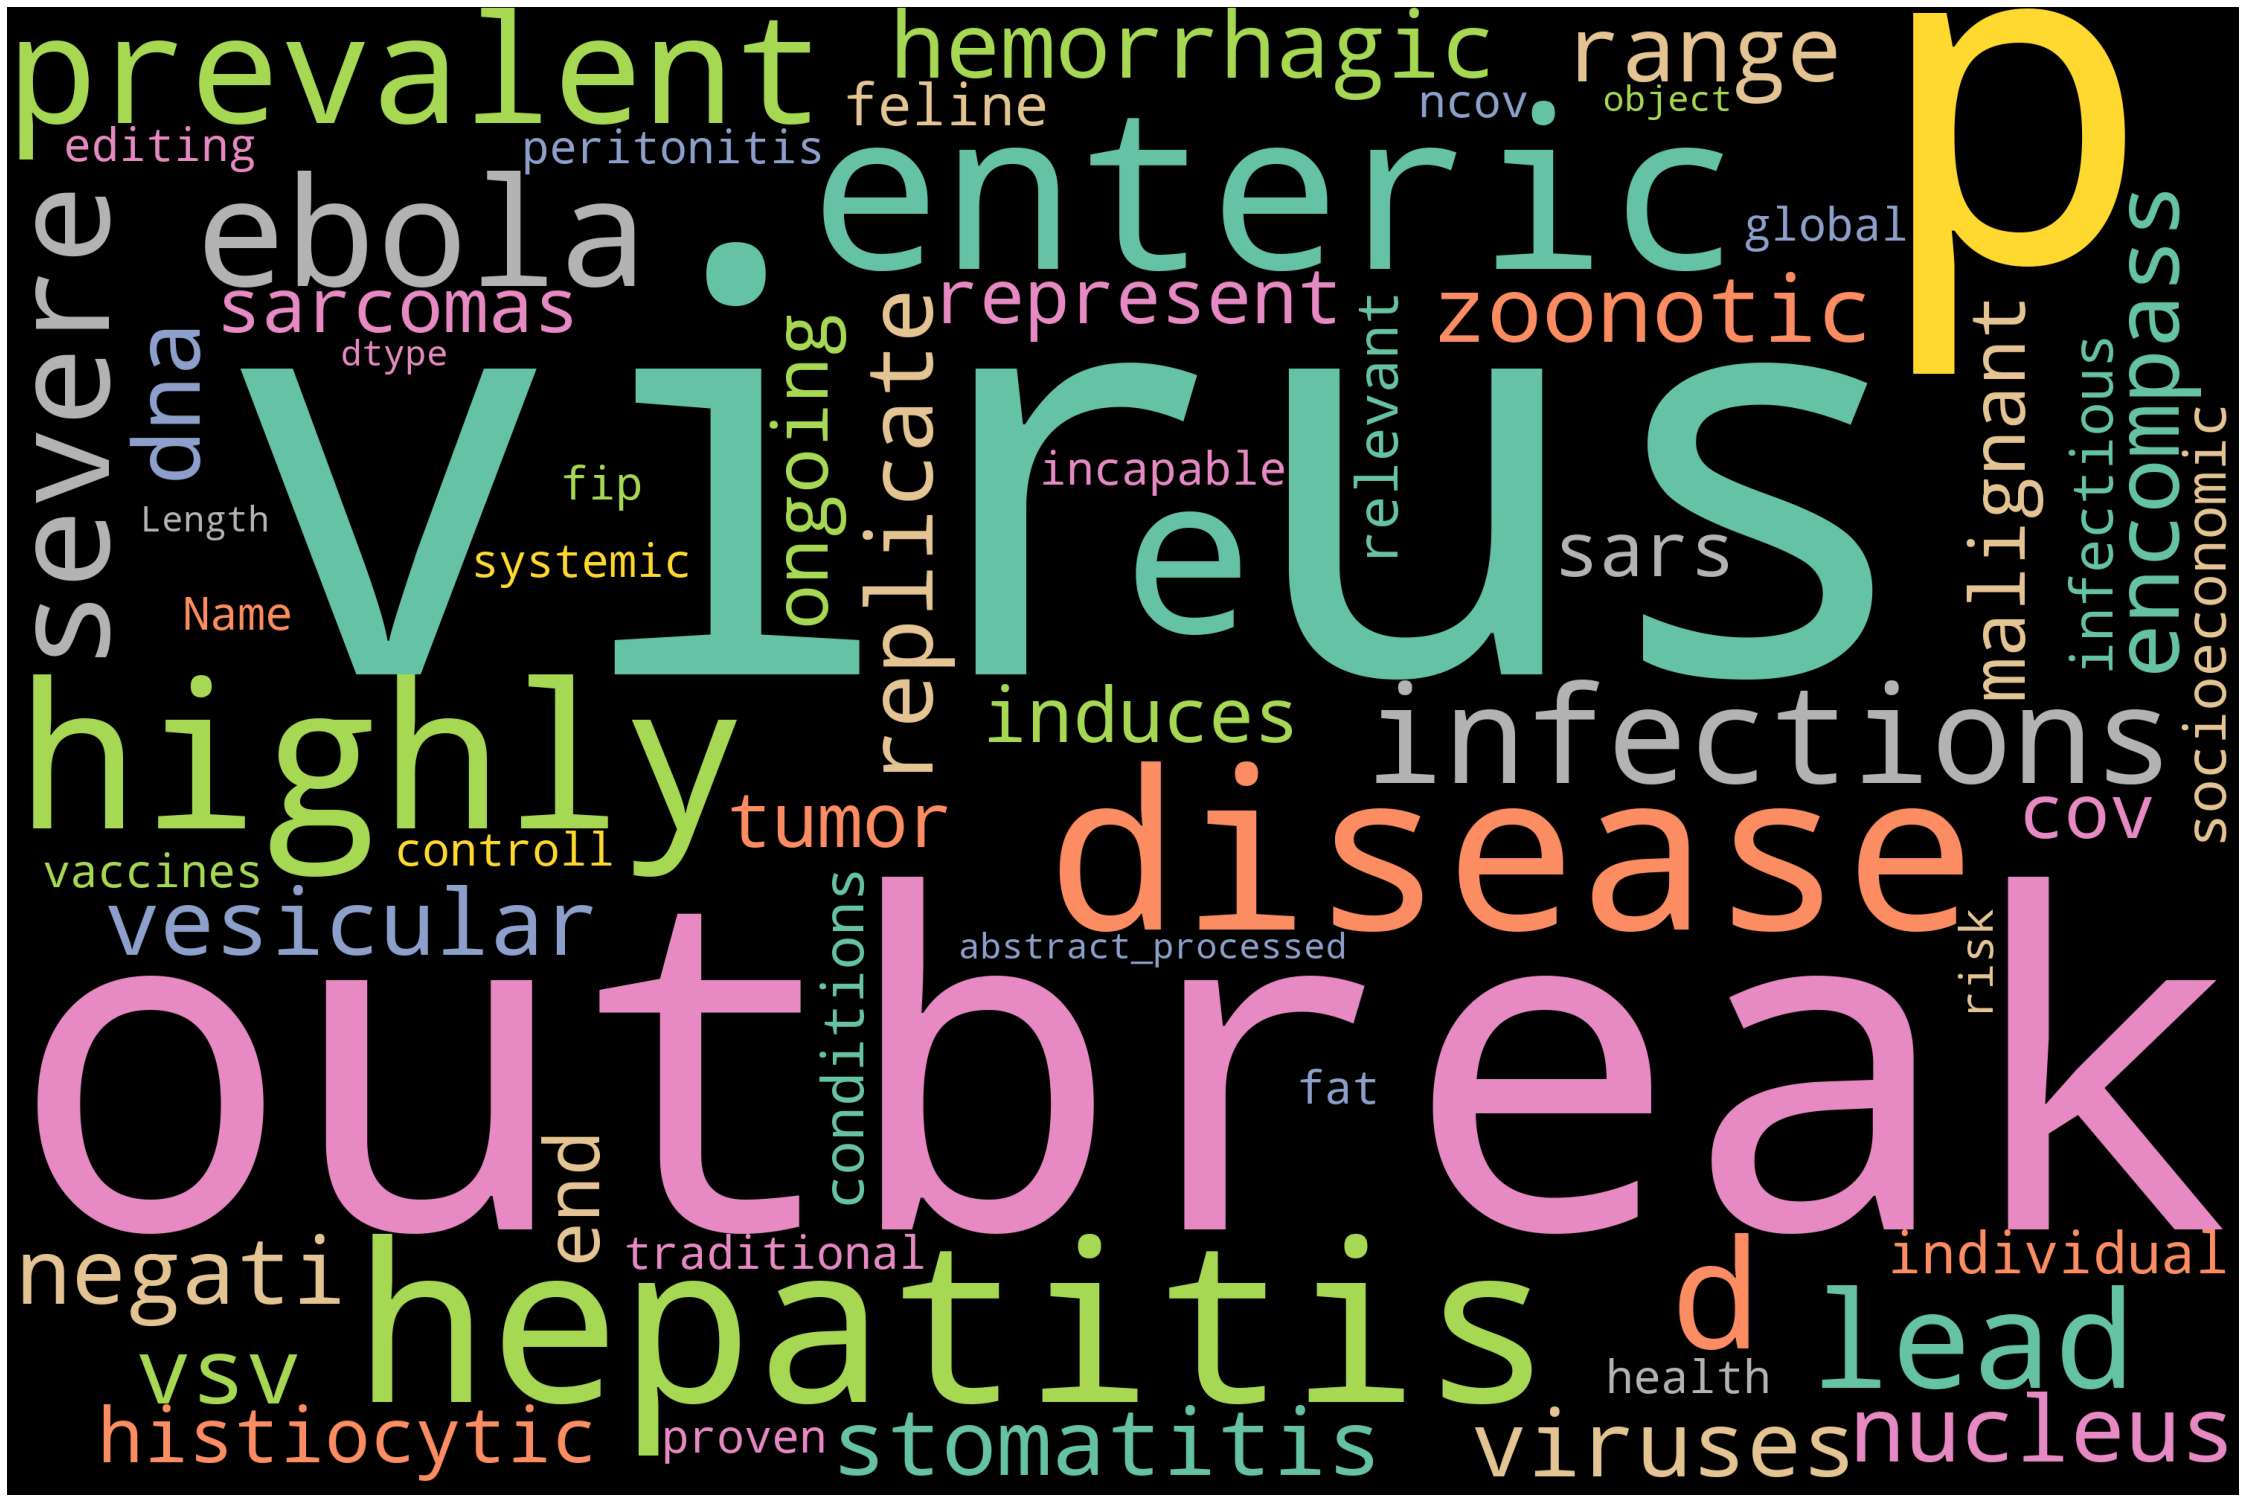

In [79]:

abstracts = str(metadata_filtered.abstract_processed)

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(abstracts)

# Plot
plot_cloud(wordcloud)

## Vectorization  <a class="anchor" id="Vectorization"></a>
Convert a collection of raw documents to a matrix of TF-IDF features.  
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

def compute_sparse_matrix(input):
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(input.astype('U'))

def compute_sparse_matrix_with_max(input, max_features):
    vectorizer = TfidfVectorizer(max_features=max_features)
    return vectorizer.fit_transform(input.astype('U'), max_features)


#### Atemprting to produce a matrix without the max_feature setup  

In [209]:
tfidf_matrix = compute_sparse_matrix(metadata_filtered['abstract_processed'].values)


In [210]:
print("The matrix size:")
tfidf_matrix

The matrix size:


<1574x16549 sparse matrix of type '<class 'numpy.float64'>'
	with 145336 stored elements in Compressed Sparse Row format>

This value (117578x163380) is too big and crushes the kernel while trying to do a PCA reduction, as such we will set a max_feature parameter.

In [211]:
print(f':::::::The matrix {type(tfidf_matrix)} size: {tfidf_matrix}')

:::::::The matrix <class 'scipy.sparse.csr.csr_matrix'> size:   (0, 6525)	0.08535428516632947
  (0, 11238)	0.04462742428603327
  (0, 15691)	0.035885411889817004
  (0, 7166)	0.04346297854646194
  (0, 6563)	0.042815955245112926
  (0, 6404)	0.04850818947278257
  (0, 12305)	0.05183219154835142
  (0, 8075)	0.0724441757128581
  (0, 5988)	0.05379529221625455
  (0, 14211)	0.07720891299027023
  (0, 1474)	0.07120605394483585
  (0, 15910)	0.05869433139026416
  (0, 5188)	0.06043845762198933
  (0, 13004)	0.0378432251389382
  (0, 14523)	0.06841534321956658
  (0, 3939)	0.05160835072252118
  (0, 10659)	0.04578422193679277
  (0, 10512)	0.08197365026768237
  (0, 2997)	0.026189067524388227
  (0, 12877)	0.05682511634594505
  (0, 10434)	0.0901190224437416
  (0, 10432)	0.07935142612089509
  (0, 12890)	0.03482902980267334
  (0, 16190)	0.0724441757128581
  (0, 11966)	0.0724441757128581
  :	:
  (1573, 16019)	0.09077548756040281
  (1573, 2026)	0.11216155685377764
  (1573, 1741)	0.06670819560312283
  (1573, 9871

Calculating the unique number of tokens

In [212]:
unique_number_of_tokens = metadata_filtered['abstract_processed'].nunique() 
unique_number_of_tokens

1573

Atempting to compute the sparse matrix with this max feature value.

In [213]:
tfidf_matrix_with_max = compute_sparse_matrix_with_max(metadata_filtered['abstract_processed'].values, unique_number_of_tokens)

In [214]:
tfidf_matrix_with_max

<1574x1573 sparse matrix of type '<class 'numpy.float64'>'
	with 101673 stored elements in Compressed Sparse Row format>

## Reducing the dimensionality with PCA  
Principal component analysis (PCA).  
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.  
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA  

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=3)
tfidf_matrix_pcaed= pca.fit_transform(tfidf_matrix_with_max.toarray())
tfidf_matrix_pcaed.shape


(1574, 851)

## Clustering <a class="anchor" id="Clustering"></a>
Running k-means on the previosly vectorized text.  
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.  
https://scikit-learn.org/stable/modules/clustering.html#k-means  
This section refrences code from: https://www.kaggle.com/maksimeren/covid-19-literature-clustering

In [94]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import datetime

# seeting the key and trying to use the elbow method to identify the proper one 
distortions = []
K = range(2, 30)
print(f'{datetime.datetime.now()} -- starting iteration --- {k}')
for k in K:
    print(f'{datetime.datetime.now()} -- starting iteration --- {k}')
    k_means = KMeans(n_clusters=k, random_state=3).fit(tfidf_matrix_pcaed)
    k_means.fit(tfidf_matrix_pcaed)
    distortions.append(sum(np.min(cdist(tfidf_matrix_pcaed, k_means.cluster_centers_, 'euclidean'), axis=1)) / tfidf_matrix_with_max.shape[0])
print(f'{datetime.datetime.now()} -- starting iteration --- {k}')

2022-01-25 10:58:19.666677 -- starting iteration --- 2
2022-01-25 10:58:20.395661 -- starting iteration --- 3
2022-01-25 10:58:21.482513 -- starting iteration --- 4
2022-01-25 10:58:22.785340 -- starting iteration --- 5
2022-01-25 10:58:24.362158 -- starting iteration --- 6
2022-01-25 10:58:26.048251 -- starting iteration --- 7
2022-01-25 10:58:28.091307 -- starting iteration --- 8
2022-01-25 10:58:30.588597 -- starting iteration --- 9
2022-01-25 10:58:33.276691 -- starting iteration --- 10
2022-01-25 10:58:36.148023 -- starting iteration --- 11
2022-01-25 10:58:39.474232 -- starting iteration --- 12
2022-01-25 10:58:43.006708 -- starting iteration --- 13
2022-01-25 10:58:46.741696 -- starting iteration --- 14
2022-01-25 10:58:50.715022 -- starting iteration --- 15
2022-01-25 10:58:55.011057 -- starting iteration --- 16
2022-01-25 10:58:59.409386 -- starting iteration --- 17
2022-01-25 10:59:04.088672 -- starting iteration --- 18
2022-01-25 10:59:09.020235 -- starting iteration --- 19


Applying the elbow method for identifying the optimum number of clusters (k)

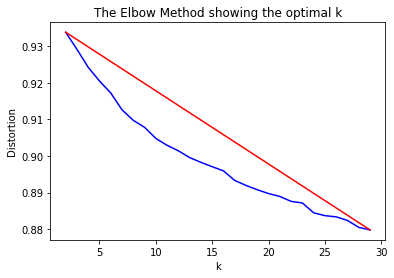

In [95]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We do not see a clear elbow (maybe at 18 ... ?).   
The first conclusion would be that a larger k would have been desirable.   
Given how CPU and time intesive the processing was we use a limmed number of clusters (30) - a larger number might have been more approriate but given the circumtances we would consider a k=18.

In [113]:
k = 6
k_means = KMeans(n_clusters=k, random_state=3)
k_means = k_means.fit_predict(tfidf_matrix_pcaed)
metadata_filtered['y'] = k_means

In [114]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117578 entries, 0 to 117577
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   cord_uid                         117578 non-null  object 
 1   sha                              59888 non-null   object 
 2   source_x                         117578 non-null  object 
 3   title                            117578 non-null  object 
 4   doi                              94497 non-null   object 
 5   pmcid                            56477 non-null   object 
 6   pubmed_id                        86790 non-null   float64
 7   license                          117578 non-null  object 
 8   abstract                         117578 non-null  object 
 9   publish_time                     117567 non-null  object 
 10  authors                          116389 non-null  object 
 11  journal                          109966 non-null  object 
 12  ur

### t-SNE <a class="anchor" id="t-SNE"></a>
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.  
By using the 2 dimensions as x,y coordinates, the abstract can be plotted.

In [115]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)
X_embedded = tsne.fit_transform(tfidf_matrix_with_max.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1574 samples in 0.002s...
[t-SNE] Computed neighbors for 1574 samples in 6.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1574
[t-SNE] Computed conditional probabilities for sample 1574 / 1574
[t-SNE] Mean sigma: 0.308805
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.465904
[t-SNE] KL divergence after 1000 iterations: 1.541377


Assesing 2D data

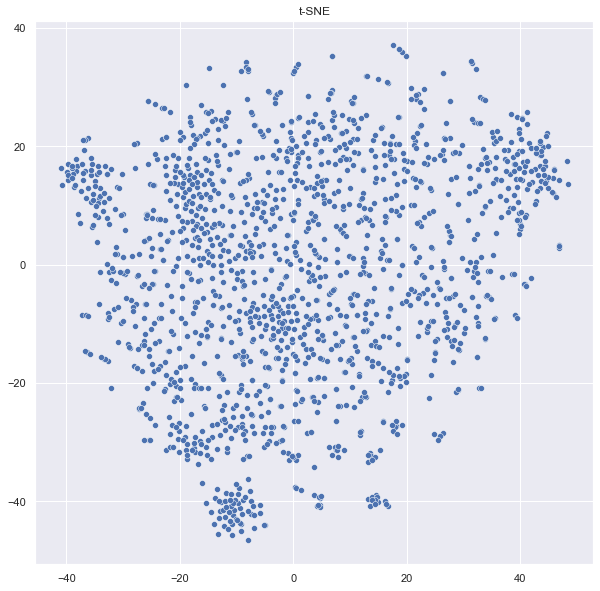

In [146]:
sns.set(rc={'figure.figsize':(10,10)})
palette = sns.color_palette("bright", 1)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE')
plt.savefig("t-sne_covid19.png")
plt.show()

Using the clusters found by k-means as colors.

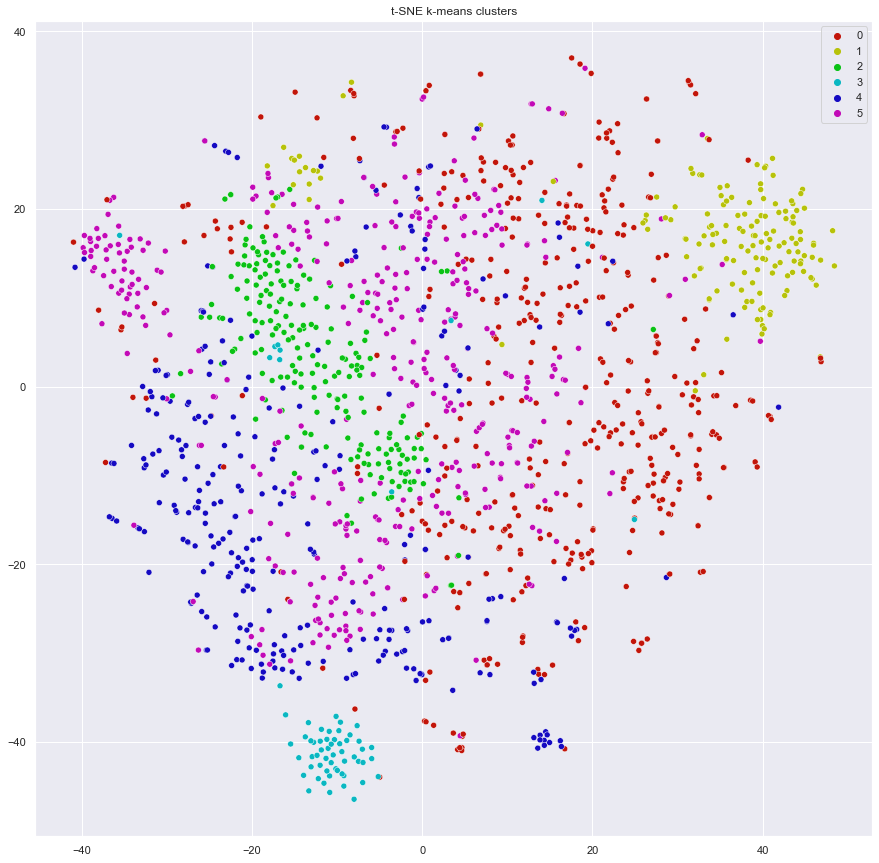

In [148]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,15)})
palette = sns.hls_palette(k, l=.4, s=.9)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=k_means, legend='full', palette=palette)
plt.title('t-SNE k-means clusters')
plt.savefig("improved_cluster_tsne.png")
plt.show()

## LDA - Latent Dirichlet Allocation <a class ="anchor" id="LDA" > </a>
It is one of the most popular topic modeling methods. Each document is made up of various words, and each topic also has various words belonging to it.   
The aim of LDA is to find topics a document belongs to, based on the words in it.
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html?  highlight=latentdirichletallocation#sklearn.decomposition.LatentDirichletAllocation  
We will retrive the most important words for each clustered we build at the previos step.  
We apply LDA to identify the topics of each cluster.

In [158]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

Verctorizer for each cluster.

In [159]:
vectorizers = []
for x in range(0, k):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=1, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [164]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(metadata_filtered.loc[metadata_filtered['y'] == current_cluster, 'abstract_processed']))
    except Exception as e:
        print(e)
        vectorized_data.append(None)

In [165]:
len(vectorized_data)

6

Vectorization of data

In [166]:
NUM_TOPICS_PER_CLUSTER = 3


lda_models = []

for ii in range(0, k):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]


LatentDirichletAllocation(learning_method='online', n_components=3,
                          random_state=42, verbose=False)

Fitting for each lda_model

In [167]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5


Getting the key words 

In [168]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

Creating the keyword object

In [169]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))


Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5


In [170]:
len(all_keywords)

6

### Printing the topics

In [172]:
for i in all_keywords:
    print(i[:10])

['covid-', 'data', 'viral', 'cells', 'virus', 'research', 'ifn-', 'lung']
['sars-cov-', 'detection', 'samples', 'primer', 'nanopore', 'barcode', 'ncovid-', 'dogs', 'naats']
['protein', 'spike', 'ace', 'expression', 'cells', 'sybodies', 'rbd']
['sars-cov', 'ace', 'virus', 'transmission', 'coronaviruses', 'ratg', 'china', 'wuhan']
['viral', 'virus', 'sars-cov-', 'structure', 'cells', 'ifitm', 'protein']
['covid-', 'infection', 'vaccine', 'virus', 'coronavirus', 'sgp', 'ufh', 'pseudotyped']


## Saving state

In [135]:
f=open('topics.txt','w')

count = 0

for x in all_keywords:
    if vectorized_data[count] != None:
        f.write(', '.join(x) + "\n")
    else:
        f.write("Not enough instances to be determined. \n")
        f.write(', '.join(x) + "\n")
    count += 1

f.close()

In [138]:
import pickle
pickle.dump(metadata_filtered, open("df_covid.p", "wb" ))
pickle.dump(X_embedded, open("X_embedded.p", "wb" ))
pickle.dump(k_means, open("y_pred.p", "wb" ))

## Cosine similarity <a class ="anchor" id="Cosine-similarity" > </a>    
Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.    
Refrences:    
https://www.machinelearningplus.com/nlp/cosine-similarity/   
https://en.wikipedia.org/wiki/Cosine_similarity    
https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity    


In [175]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix[0:1], tfidf_matrix).flatten()

# 10 most related documents indices
related_docs_indices = cosine_similarities.argsort()[:-6:-1]
print("Related Document:",related_docs_indices)

# Cosine Similarties of related documents
print("Cosine Similarites of related documents",cosine_similarities[related_docs_indices])
related_docs_indices


Related Document: [   0 1424  706  973 1064]
Cosine Similarites of related documents [1.         0.2284007  0.15179405 0.13175779 0.13007415]


array([   0, 1424,  706,  973, 1064])

In [184]:
print(f"Articles identified as similar:\n1\n{metadata_filtered.iloc[1424]['abstract']}\n2.\n{metadata_filtered.iloc[706]['abstract']}")

Articles identified as similar:
1
In early December 2019 a cluster of cases of pneumonia of unknown cause was identified in Wuhan, a city of 11 million persons in the People’s Republic of China. Further investigation revealed these cases to result from infection with a newly identified coronavirus, initially termed 2019-nCoV and subsequently SARS-CoV-2. The infection moved rapidly through China, spread to Thailand and Japan, extended into adjacent countries through infected persons travelling by air, eventually reaching multiple countries and continents. Similar to such other coronaviruses as those causing the Middle East respiratory syndrome (MERS) and severe acute respiratory syndrome (SARS), the new coronavirus was reported to spread via natural aerosols from human-to-human. In the early stages of this epidemic the case fatality rate is estimated to be approximately 2%, with the majority of deaths occurring in special populations. Unfortunately, there is limited experience with coro

## Doc2Vec  <a class ="anchor" id="Doc2Vec" > </a> 
Doc2Vec is a Model that represents each Document as a Vector.   
Doc2vec uses an unsupervised learning approach to better understand documents as a whole.    

Refrences:    
https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-download-auto-examples-tutorials-run-doc2vec-lee-py   
https://heartbeat.fritz.ai/getting-started-with-doc2vec-2645e3e9f137    

In [215]:
import gensim
from gensim.models import Doc2Vec

def doc2vec():
    document_tagged = []
    tagged_count = 0
    for _ in metadata_filtered['abstract_processed'].values:
        document_tagged.append(gensim.models.doc2vec.TaggedDocument(_,[tagged_count]))
        tagged_count +=1 
    d2v = Doc2Vec(document_tagged)
    d2v.train(document_tagged,epochs=d2v.epochs,total_examples=d2v.corpus_count)
    return d2v.docvecs.vectors_docs, d2v

In [216]:
# Let's explore the data representation of doc2vec for abstract column.
# Visualization the doc2vec representation
%time doc2vec, dv2 = doc2vec()

CPU times: user 8.48 s, sys: 571 ms, total: 9.05 s
Wall time: 5.26 s


array([[ 0.07784355, -0.06711941,  0.02743882, ...,  0.04311662,
         0.30035013,  0.0578707 ],
       [ 0.30709556, -0.16212039, -0.38652995, ..., -0.13188219,
         0.01753387,  0.17946321],
       [-0.0284164 ,  0.07119921, -0.03256557, ..., -0.12521517,
         0.13901988,  0.0629696 ],
       ...,
       [-0.04886007,  0.29433113, -0.02437793, ..., -0.00317816,
         0.29639447, -0.06394938],
       [-0.01535494,  0.1385098 ,  0.0296902 , ..., -0.11862468,
         0.1126231 ,  0.06590536],
       [ 0.03548139,  0.02986429, -0.12601945, ..., -0.19311562,
         0.21063699, -0.02572991]], dtype=float32)

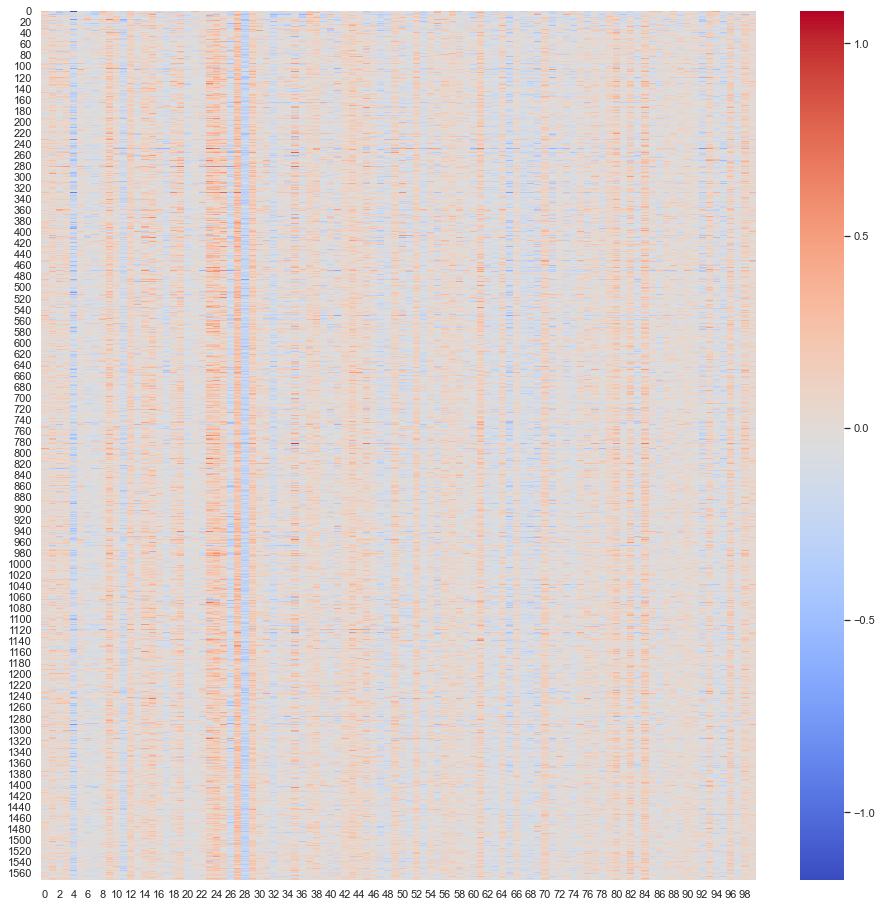

In [187]:
# import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(doc2vec,cmap="coolwarm")
doc2vec

Now, we can use the trained model to infer a vector for any piece of text by passing a list of words to the model.infer_vector function. This vector can then be compared with other vectors via cosine similarity.

In [188]:
vector = dv2.infer_vector(['factors', 'covid', 'infection'])
print(vector)

[ 3.4624052e-03 -3.7640142e-03 -4.5463750e-03  3.1093231e-03
 -6.1415037e-04  4.6111275e-03  3.2775116e-03  2.0073541e-03
  3.3222321e-05  1.3545483e-03 -4.1870717e-03 -2.1757146e-03
 -3.3752993e-03 -2.8359175e-03  4.2729941e-03 -2.0621896e-04
  4.0822923e-03  9.5242239e-04 -6.4785552e-04  3.9116079e-03
 -4.5425412e-03  2.0461627e-03  3.7919718e-03 -3.6387187e-03
 -2.7093040e-03 -2.4318062e-03 -3.8788086e-03 -2.2554260e-03
 -2.6987186e-03  3.5663473e-04 -2.9701812e-03 -1.1600399e-03
 -4.3937857e-03 -3.3562630e-04  4.6960544e-03 -1.2005665e-03
 -3.4623994e-03 -3.6294134e-03 -4.3422729e-04 -6.6997373e-04
  4.7454298e-03  4.1038417e-03  3.7827438e-03  1.5876485e-05
  4.2695324e-03  4.1450537e-03  7.8255223e-04 -1.7561880e-03
 -1.7325341e-03  2.8304534e-03  1.4982729e-03 -7.1674568e-04
  2.3288508e-03 -3.1253218e-03  1.3188187e-04 -3.6400629e-03
  4.4606193e-03  1.2635110e-03  4.8631444e-03 -2.3418276e-03
  1.0806610e-03 -4.1328501e-03 -2.3940138e-03 -1.6438118e-03
 -4.1571078e-03 -2.82745

## Doc2Vec - Another approach 
http://csmoon-ml.com/index.php/2019/02/15/tutorial-doc2vec-and-t-sne/

In [235]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /Users/dantohe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [236]:
list_id = list(metadata_filtered["cord_uid"])
list_def = list(metadata_filtered['abstract_processed'])

tagged_data = [TaggedDocument(words=word_tokenize(term_def.lower()), tags=[list_id[i]]) for i, term_def in enumerate(list_def)]

In [237]:
max_epochs = 500
vec_size = 100
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm=1)
  
model.build_vocab(tagged_data)

In [238]:
for epoch in range(max_epochs):
    if epoch % 100 == 0:
        print('iteration {0}'.format(epoch))

    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    
    model.alpha -= 0.0002
    model.min_alpha = model.alpha

model.save("d2v.model")

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


In [229]:
model.wv.most_similar('virus')

[('protein', 0.977637767791748),
 ('covid-19', 0.9741448163986206),
 ('disease', 0.9668501019477844),
 ('infection', 0.9612475633621216),
 ('binding', 0.9580204486846924),
 ('viruses', 0.9559509754180908),
 ('rna', 0.9515025615692139),
 ('sars-cov-2', 0.950421154499054),
 ('cell', 0.9290528297424316),
 ('present', 0.9230234622955322)]

In [231]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

In [ ]:
def parser(metadata_filtered):
    df_dx = pd.DataFrame(columns=['id', 'name', 'def', 'is_a'])

    with open(input_file, "r") as f:
        term_id = term_name = term_def = None
        term_is_a = []

        for line in f:
            line = line.rstrip('\n')

            if "[Term]" in line or "[Typedef]" in line:            
                if term_def:
                    df_dx.loc[len(df_dx)] = [term_id, term_name, term_def, term_is_a]

                term_id = term_name = term_def = None
                term_is_a = []
            elif "id: " == line[0:4]:
                term_id = line.split("id: ")[1]
            elif "name: " in line:
                term_name = line.split("name: ")[1]
            elif "def: " in line:
                temp = line.split("def: ")[1]
                term_def = temp.split("\"")[1]
            elif "is_a: " in line:
                temp = line.split("is_a: ")[1]
                temp = temp.split(" ! ")[0]
                term_is_a.append(temp)

    return df_dx

In [233]:
def plotScatter(keyword):
    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot(1, 1, 1)

    pos_found_x = []
    pos_found_y = []
    found_names = []

    pos_rest_x = []
    pos_rest_y = []

    for term_id, pos in df.iterrows():
        term_name = metadata_filtered[metadata_filtered["cord_uid"] == term_id]['name'].values[0]
        term_def = metadata_filtered[metadata_filtered["cord_uid"] == term_id]['def'].values[0].lower()

        if keyword in term_name:
            pos_found_x.append(pos['x'])
            pos_found_y.append(pos['y'])
        elif keyword in term_def:
            pos_found_x.append(pos['x'])
            pos_found_y.append(pos['y'])
        else:
            found = False
            is_a_list = metadata_filtered[metadata_filtered["cord_uid"] == term_id]['is_a'].tolist()[0]

            for is_a_id in is_a_list:
                if len(df_dx[df_dx['id'] == is_a_id]) > 0:
                    if keyword in df_dx[df_dx['id'] == is_a_id]['name'].values[0]:
                        pos_found_x.append(pos['x'])
                        pos_found_y.append(pos['y'])
                        found = True
                        break
                    elif keyword in df_dx[df_dx['id'] == is_a_id]['def'].values[0].lower():
                        pos_found_x.append(pos['x'])
                        pos_found_y.append(pos['y'])
                        found = True
                        break

            if found == False:
                pos_rest_x.append(pos['x'])
                pos_rest_y.append(pos['y']) 

    ax.scatter(pos_rest_x, pos_rest_y, c='blue')       
    ax.scatter(pos_found_x, pos_found_y, c='red')

In [ ]:
plotScatter(keyword="virus")

## Simple K-Means clustering with Within Cluster and Between Cluster Analysis  <a class ="anchor" id="simple-k-means" > </a>       
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html   
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203    
https://www.kaggle.com/phyothuhtet/document-clustering-self-organizing-map-kmeans   

In [194]:
from sklearn.cluster import KMeans
def kmeans(n_clusters):
    kmean_model = KMeans(n_clusters = n_clusters,random_state=0)
    return kmean_model

In [190]:
kmeans4 = KMeans(4)
%time km4 = kmeans4.fit_predict(doc2vec)

kmeans5 = KMeans(5)
%time km5 = kmeans5.fit_predict(doc2vec)

kmeans6 = KMeans(6)
%time km6 = kmeans6.fit_predict(doc2vec)

kmeans7 = KMeans(7)
%time km7 = kmeans7.fit_predict(doc2vec)

CPU times: user 1.32 s, sys: 151 ms, total: 1.47 s
Wall time: 289 ms
CPU times: user 1.77 s, sys: 138 ms, total: 1.91 s
Wall time: 310 ms
CPU times: user 2.18 s, sys: 157 ms, total: 2.33 s
Wall time: 375 ms
CPU times: user 1.89 s, sys: 131 ms, total: 2.02 s
Wall time: 327 ms


#### Within Cluster and Between Cluster Analysis    


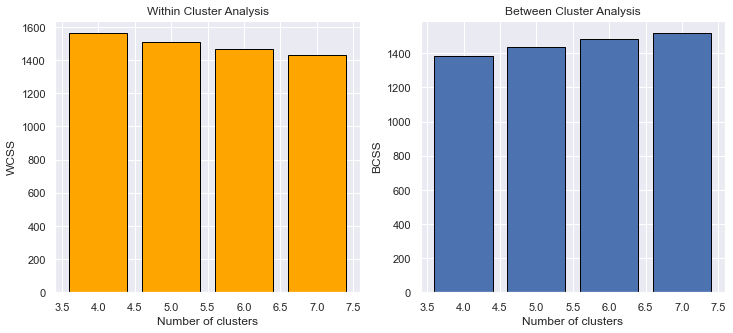

In [191]:
models = [kmeans4, kmeans5, kmeans6, kmeans7]
def plot_WCSS_BCSS(models, data):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    ## Plot WCSS
    wcss = [mod.inertia_ for mod in models]
    n_clusts = [4,5,6,7]
    
    ax[0].bar(n_clusts, wcss,color='orange', edgecolor='black', linewidth=1)
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('WCSS')
    ax[0].set_title('Within Cluster Analysis')
    
    
    ## Plot BCSS 
    n_1 = (float(data.shape[0]) * float(data.shape[1])) - 1.0
    tss = n_1 * np.var(data)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss,edgecolor='black')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('BCSS')
    ax[1].set_title('Between Cluster Analysis')
    plt.show()
    

plot_WCSS_BCSS(models,doc2vec)

In [192]:
from sklearn.metrics import silhouette_score

def plot_silhouette(kms,data,nclusts):
    
    silhouette = []
    for i in kms:
        score = silhouette_score(data,i)
        print(score)
        silhouette.append(score)
    
    
    plt.bar(nclusts, silhouette,color = 'green')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

0.074208416
0.07261995
0.05651872
0.057324894


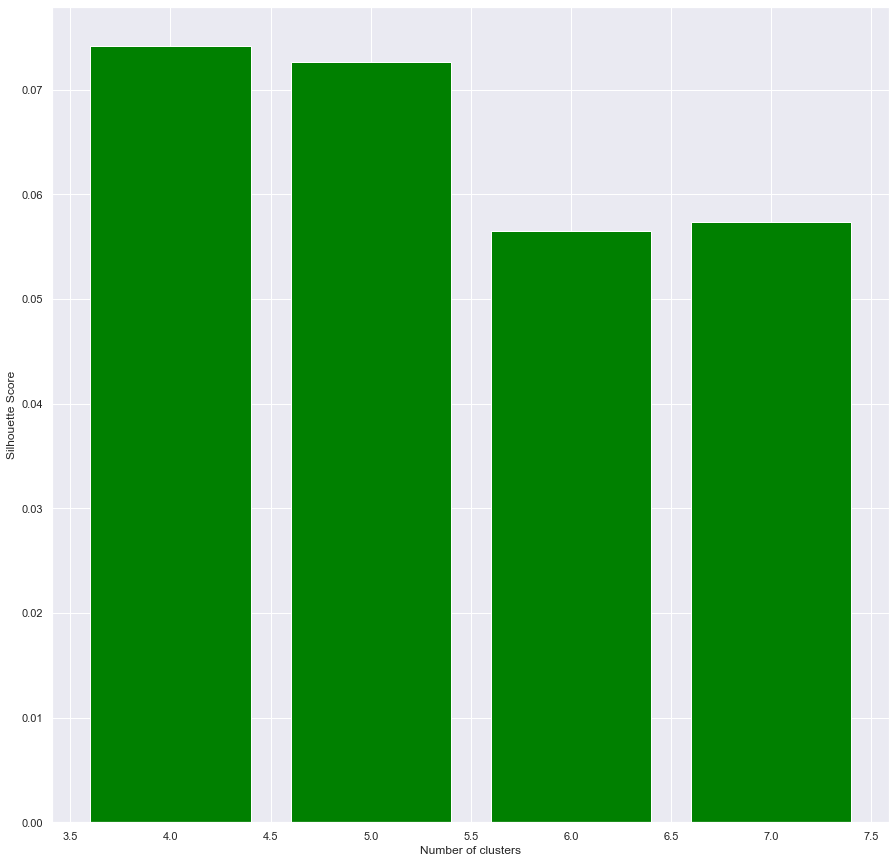

CPU times: user 1.39 s, sys: 31.8 ms, total: 1.42 s
Wall time: 1.43 s


In [193]:
%time plot_silhouette([km4,km5,km6,km7],doc2vec,[4,5,6,7])
